In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam

C:\Users\arnim\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
C:\Users\arnim\anaconda3\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
IMG_SIZE = (128, 128)
input_shape = IMG_SIZE + (3,)

In [3]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.1
)

train_generator = train_datagen.flow_from_directory(
    'cropped', 
    target_size=IMG_SIZE,
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

validation_generator = train_datagen.flow_from_directory(
    'cropped',
    target_size=IMG_SIZE,
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)

Found 5452 images belonging to 3 classes.
Found 604 images belonging to 3 classes.


In [4]:
model = Sequential()

In [5]:
model.add(Conv2D(96, (11, 11), strides=(4, 4), activation='relu', input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(3, 3), strides=(2, 2)))
model.add(Conv2D(256, (5, 5), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(3, 3), strides=(2, 2)))
model.add(Conv2D(384, (3, 3), padding='same', activation='relu'))
model.add(Conv2D(384, (3, 3), padding='same', activation='relu'))
model.add(Conv2D(256, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(3, 3), strides=(2, 2)))
model.add(Flatten())
model.add(Dense(4096, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(4096, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(3, activation='softmax'))


In [6]:
adam = Adam(learning_rate=0.001)
model.compile(optimizer=adam, loss='categorical_crossentropy', metrics=['accuracy'])


In [9]:
history = model.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=50,
    steps_per_epoch=train_generator.samples // 32,
    validation_steps=validation_generator.samples // 32
)

Epoch 1/50
170/170 [==============================] - 182s 1s/step - loss: 1.0158 - accuracy: 0.4546 - val_loss: 0.9386 - val_accuracy: 0.5434
Epoch 2/50
170/170 [==============================] - 179s 1s/step - loss: 0.8767 - accuracy: 0.5808 - val_loss: 0.9125 - val_accuracy: 0.5382
Epoch 3/50
170/170 [==============================] - 180s 1s/step - loss: 0.8248 - accuracy: 0.6205 - val_loss: 0.7149 - val_accuracy: 0.7083
Epoch 4/50
170/170 [==============================] - 181s 1s/step - loss: 0.7326 - accuracy: 0.6851 - val_loss: 0.6516 - val_accuracy: 0.7378
Epoch 5/50
170/170 [==============================] - 180s 1s/step - loss: 0.6712 - accuracy: 0.7258 - val_loss: 0.6298 - val_accuracy: 0.7500
Epoch 6/50
170/170 [==============================] - 172s 1s/step - loss: 0.6430 - accuracy: 0.7454 - val_loss: 0.6309 - val_accuracy: 0.7656
Epoch 7/50
170/170 [==============================] - 169s 992ms/step - loss: 0.6226 - accuracy: 0.7509 - val_loss: 0.5983 - val_accuracy: 0.7

In [10]:
loss, accuracy = model.evaluate(validation_generator)
print(f"Validation Accuracy: {accuracy * 100:.2f}%")

19/19 [==============================] - 7s 359ms/step - loss: 0.3469 - accuracy: 0.8675
Validation Accuracy: 86.75%


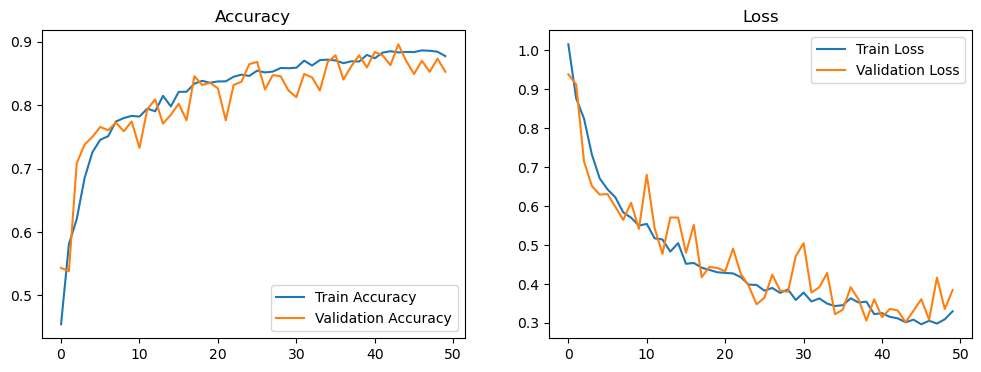

In [11]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss')
plt.legend()

plt.show()

In [12]:
model.save('brain_tumor_alexnet.h5')

C:\Users\arnim\anaconda3\lib\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
